<a href="https://colab.research.google.com/github/eunsun53/ML_proj/blob/main/multi_task_learning_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 이미지 다중 속성 분류 미션 

> 운송수단 이미지 분류 - 타입, 색상의 큰 카테고리로 나눌 수 있음 
>> 타입의 세부 속성(5): bike, car, helicopter, ship, truck 

>> 색상의 세부 속성(4): black, red, blue, green 

In [9]:
#드라이브-코랩 연동 
from google.colab import drive 
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [10]:
cd /content/gdrive/MyDrive/dataset/automobile_img

/content/gdrive/MyDrive/dataset/automobile_img


In [11]:
#!unzip automobile_img.zip

In [12]:
pwd

'/content/gdrive/MyDrive/dataset/automobile_img'

In [13]:
import os 
import cv2
import matplotlib.pyplot as plt
import pandas as pd 
import tensorflow as tf 

#data load and preparation

In [14]:
data_dir = '/content/gdrive/MyDrive/dataset/automobile_img'
list_of_data = []
img_size = 128
for fol in os.listdir(data_dir):
    for file in os.listdir(os.path.join(data_dir, fol)):
        json_dict = {}
        img_arr = cv2.imread(os.path.join(os.path.join(data_dir, fol), file))[...,::-1] #convert BGR to RGB format
        resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
        json_dict['image'] = resized_arr
        json_dict['class_1'] = fol.split('_')[0]
        json_dict['class_2'] = fol.split('_')[1]
        list_of_data.append(json_dict)


In [15]:
list_of_data[:3] # {class_1, class_2, image(size: 128*128)} 세가지에 대해 각각의 이미지 데이터 정보가 담김

[{'class_1': 'black', 'class_2': 'bike', 'image': array([[[21, 13, 10],
          [21, 13, 10],
          [20, 12,  9],
          ...,
          [56, 57, 87],
          [49, 50, 80],
          [44, 45, 76]],
  
         [[21, 14, 10],
          [21, 13, 10],
          [20, 12,  9],
          ...,
          [61, 62, 92],
          [53, 54, 83],
          [49, 50, 80]],
  
         [[22, 14, 11],
          [21, 13, 10],
          [20, 12,  9],
          ...,
          [66, 67, 97],
          [53, 54, 84],
          [49, 50, 80]],
  
         ...,
  
         [[64, 49, 44],
          [67, 52, 47],
          [66, 51, 46],
          ...,
          [38, 37, 51],
          [40, 39, 55],
          [40, 39, 55]],
  
         [[61, 47, 43],
          [62, 48, 45],
          [63, 48, 45],
          ...,
          [36, 36, 49],
          [36, 34, 49],
          [36, 34, 49]],
  
         [[65, 51, 48],
          [64, 50, 47],
          [67, 53, 49],
          ...,
          [35, 35, 47],
         

In [16]:
list_of_data[0]['class_1']

'black'

In [17]:
list_of_data[0]['class_2']

'bike'

In [18]:
list_of_data[0]['image'].shape

(128, 128, 3)

class_1: black, class_2: bike


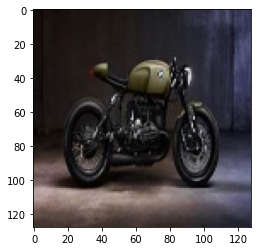

In [21]:
img_0 = list_of_data[0]['image']
plt.imshow(img_0)
print('class_1: {}, class_2: {}'.format(list_of_data[0]['class_1'], list_of_data[0]['class_2']))

In [22]:
import numpy as np 

In [24]:
from posixpath import lexists
x_train, y_train = [], []
NUM_IMG = len(list_of_data)

for i in range(NUM_IMG):
  x_train.append(list_of_data[i]['image'])
  y_train.append([list_of_data[i]['class_1'], list_of_data[i]['class_2']])

x_train = np.array(x_train)/255
print(x_train.shape) # (948, 128, 128, 3) == (128, 128, 3)이미지 * 948개 

(948, 128, 128, 3)


In [25]:
#x_train.reshape(x_train.shape[0], img_size, img_size, 3)
#print(x_train.shape)

(948, 128, 128, 3)


# Data Augmentation

In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [28]:
datagen = ImageDataGenerator(
    featurewise_center = False,
    samplewise_center = False,
    featurewise_std_normalization = False,
    samplewise_std_normalization = False,
    rotation_range = 30,
    zoom_range = 0.2,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip = True,
    vertical_flip = False
)
datagen.fit(x_train)

# Preparing target data(y) 

In [29]:
y_train = np.array(y_train)

In [30]:
print(y_train.shape)

(948, 2)


In [33]:
print(y_train[:5])

[['black' 'bike']
 ['black' 'bike']
 ['black' 'bike']
 ['black' 'bike']
 ['black' 'bike']]


In [37]:
class_1 = y_train[:, 0]
class_2 = y_train[:, 1]
NUM_C1 = len(set(class_1))
NUM_C2 = len(set(class_2))

map_1 = {}
for i, j in enumerate(list(set(class_1))):
  map_1[j] = i
map_2 = {}
for i, j in enumerate(list(set(class_2))):
  map_2[j] = i

print(map_1)
print(map_2)

{'green': 0, 'red': 1, 'white': 2, 'black': 3}
{'car': 0, 'truck': 1, 'bike': 2, 'helicopter': 3, 'ship': 4}


In [39]:
print(set(class_1))

{'green', 'red', 'white', 'black'}


In [40]:
class_arr1 = []
for x in class_1:
  class_arr1.append(map_1[x])
class_arr1 = np.array(class_arr1)

class_arr2 = []
for x in class_2:
  class_arr2.append(map_2[x])
class_arr2 = np.array(class_arr2)


# Modeling 

In [41]:
import tensorflow_hub as hub

In [48]:
inputs = tf.keras.layers.Input(shape = [128, 128, 3], name = 'main_input')
main_branch =  hub.KerasLayer("https://tfhub.dev/google/imagenet/mobilenet_v2_075_128/classification/5")(inputs)
main_branch = tf.keras.layers.Flatten()(main_branch)
main_branch = tf.keras.layers.Dense(1024, activation = 'relu')(main_branch)
# class_1 세부 분류 브랜치
colour_branch = tf.keras.layers.Dense(NUM_C1, activation = 'softmax', name = 'colour_output')(main_branch)
# class_2 세부 분류 브랜치 
auto_branch = tf.keras.layers.Dense(NUM_C2, activation = 'softmax', name = 'auto_output')(main_branch)

model = tf.keras.Model(inputs = inputs, outputs = [colour_branch, auto_branch])

model.compile(optimizer = 'rmsprop', 
              loss={'colour_output': 'sparse_categorical_crossentropy', 'auto_output': 'sparse_categorical_crossentropy'},
              loss_weights={'colour_output': .001, 'auto_output': 1.})

model.fit(
    {'main_input': x_train},
    {'colour_output': class_arr1, 'auto_output': class_arr2},
    epochs = 10,
    batch_size = 128,
    verbose = 1,
    validation_split = 0.2
)



Epoch 1/10
6/6 [==============================] - 12s 1s/step - loss: 0.8574 - colour_output_loss: 1.4707 - auto_output_loss: 0.8560 - val_loss: 0.1382 - val_colour_output_loss: 2.8966 - val_auto_output_loss: 0.1353
Epoch 2/10
6/6 [==============================] - 6s 1s/step - loss: 0.0148 - colour_output_loss: 1.0072 - auto_output_loss: 0.0138 - val_loss: 0.1243 - val_colour_output_loss: 2.7875 - val_auto_output_loss: 0.1215
Epoch 3/10
6/6 [==============================] - 7s 1s/step - loss: 0.0037 - colour_output_loss: 0.8266 - auto_output_loss: 0.0029 - val_loss: 0.1236 - val_colour_output_loss: 3.3326 - val_auto_output_loss: 0.1202
Epoch 4/10
6/6 [==============================] - 7s 1s/step - loss: 0.0017 - colour_output_loss: 0.7185 - auto_output_loss: 9.6909e-04 - val_loss: 0.1271 - val_colour_output_loss: 2.9808 - val_auto_output_loss: 0.1242
Epoch 5/10
6/6 [==============================] - 6s 1s/step - loss: 0.0011 - colour_output_loss: 0.5828 - auto_output_loss: 5.4809e-04

# 임의의 데이터로 결과 출력해보기 

In [49]:
dir_2 = '/content/gdrive/MyDrive/dataset/automobile_test'
test_list = []
for file in os.listdir(dir_2):
    if file.split('.')[1] != 'ipynb':
        json_dict = {}
        img_arr = cv2.imread(os.path.join(dir_2, file))[...,::-1] #convert BGR to RGB format
        resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
        json_dict['image'] = resized_arr
        test_list.append(json_dict)
test = np.array(test_list)


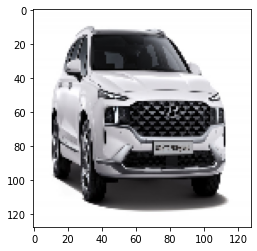

In [53]:
plt.imshow(test[0]['image'])

In [54]:
test.shape

(3,)

In [55]:
x_test = []
for i in range(test.shape[0]):
    x_test.append(test[i]['image'])
x_test = np.array(x_test) / 255
x_test.reshape(x_test.shape[0], img_size, img_size, 3)
x_test.shape # test이미지: (128, 128, 3)* 3개

(3, 128, 128, 3)

# Prediction

In [59]:
x_test.shape

(3, 128, 128, 3)

In [61]:
preds = model.predict(x_test)
preds[0].shape

(3, 4)

In [63]:
col = []
aut = []
for i in range(preds[0].shape[0]):
  col.append(np.argmax(preds[0][i]))
  aut.append(np.argmax(preds[1][i]))

re_map1 = {}
for k, v in map_1.items():
  re_map1[v] = k
re_map2 = {}
for k, v in map_2.items():
  re_map2[v] = k 

In [64]:
for i in range(len(col)):
  print(re_map1[col[i]], re_map2[aut[i]])

black car
green bike
black truck


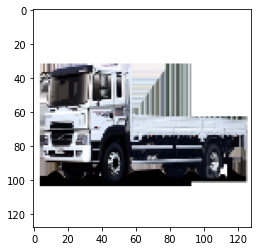

In [65]:
for i in range(x_test.shape[0]):
  plt.imshow(x_test[i])